<h2>Load Libraries</h2>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

<h2>Load Dataset</h2>

In [7]:
data = pd.read_json('News_Category_Dataset_v3.json',lines=True)

In [8]:
df_news = data.copy()

<h2>Pre-Processing (EDA)</h2>

<h4>Convert Json to CSV</h4>

In [9]:
df_news.to_csv('News_Category_Dataset_v3.json', index=False)

<h4>View Dataser</h4>

<h5>View First 5 Rows</h5>

In [10]:
df_news.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


<h5>View First 5 Rows</h5>

In [11]:
df_news.tail()

,link,headline,category,short_description,authors,date
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28
209526,https://www.huffingtonpost.com/entry/dwight-ho...,Dwight Howard Rips Teammates After Magic Loss ...,SPORTS,The five-time all-star center tore into his te...,,2012-01-28


Rows & Columns in Dataset

In [27]:
df_news.shape

(113214, 6)

In [13]:
df_news.columns

Index(['link', 'headline', 'category', 'short_description', 'authors', 'date'], dtype='object')

In [14]:
df_news['category'].unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

Limitize the Categories

In [15]:
target_categories = [
    'POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 
    'STYLE & BEAUTY', 'PARENTING', 'HEALTHY LIVING', 'QUEER VOICES'
]

In [16]:
df_news['category'] = df_news['category'].apply(lambda x: x if x in target_categories else 'OTHERS')

In [17]:
df_news['category'].unique()

array(['OTHERS', 'PARENTING', 'ENTERTAINMENT', 'POLITICS', 'WELLNESS',
       'STYLE & BEAUTY', 'QUEER VOICES', 'TRAVEL', 'HEALTHY LIVING'],
      dtype=object)

In [25]:
#adjust the data in dataset
others_indices = df_news[df_news['category'] == 'OTHERS'].index
indices_to_delete = others_indices[:len(others_indices) // 2]
df_news = df_news.drop(indices_to_delete).reset_index(drop=True)

<h5>View Dataset in Graph</h5>

View dataset based on Categories frequency

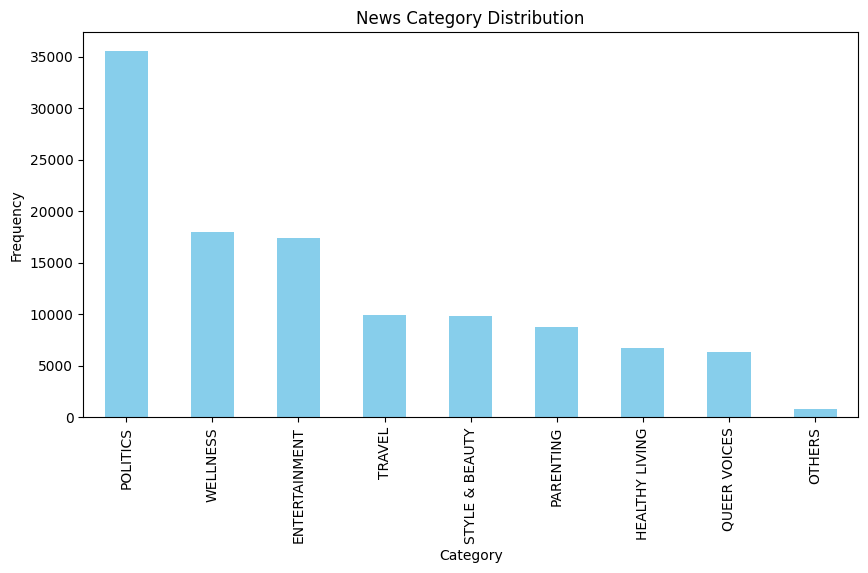

In [26]:
categories = df_news['category'].value_counts()
plt.figure(figsize=(10, 5))
categories.plot(kind='bar', color='skyblue')
plt.title('News Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

Check Null Values

In [28]:
df_news.isnull().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

<h5>Text Cleaning:</h5>
Remove punctuation,
Tokenization,
Removing Stop words,
Lemmatization (base form enhance form of Stemming)

In [32]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\umarf\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\umarf\AppData\Roaming\nltk_data...


True

In [33]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenization (split into words)
    tokens = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return " ".join(tokens)


Apply the pre-processing function

In [35]:
df_news['processed_headline'] = df_news['headline'].apply(preprocess_text)

View old Headline & Processed Headline

In [38]:
df_news[['headline', 'processed_headline']].head(10)

,headline,processed_headline
0,The Funniest Tweets From Parents This Week (Se...,funniest tweet parent week sept 1723
1,Golden Globes Returning To NBC In January Afte...,golden globe returning nbc january year offair
2,Biden Says U.S. Forces Would Defend Taiwan If ...,biden say u force would defend taiwan china in...
3,‘Beautiful And Sad At The Same Time’: Ukrainia...,beautiful sad time ukrainian cultural festival...
4,James Cameron Says He 'Clashed' With Studio Be...,james cameron say clashed studio avatar release
5,Biden Says Queen's Death Left 'Giant Hole' For...,biden say queen death left giant hole royal fa...
6,Amazon Greenlights 'Blade Runner 2099' Limited...,amazon greenlights blade runner 2099 limited s...
7,Bill To Help Afghans Who Escaped Taliban Faces...,bill help afghan escaped taliban face long odd...
8,'The Phantom Of The Opera' To Close On Broadwa...,phantom opera close broadway next year
9,Mark Meadows Complies With Justice Dept. Subpo...,mark meadow complies justice dept subpoena report


Feature Extraction

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_news['processed_headline'])

In [40]:
X.shape

(113214, 42145)

Encode Lables into Numeric form

In [41]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(df_news['category'])

In [42]:
y[:10]


array([3, 0, 4, 4, 0, 4, 0, 4, 0, 4])

<h5>Split Dataset into Train Test</h5>

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h5>Train Model SVM</h5>

In [45]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

Prediction

In [46]:
y_pred = model.predict(X_test)
y_pred[:10]

array([6, 8, 8, 4, 6, 4, 5, 4, 3, 6])

<h4>Evaluation</h4>

Accuracy

In [47]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [48]:
accuracy = accuracy_score(y_test, y_pred)

In [49]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

Accuracy of model

In [50]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.7900013249127765


Precision of model

In [51]:
print(f"Precision: {precision}")

Precision: 0.7853899647146411


Recall of model

In [52]:
print(f"Recall: {recall}")

Recall: 0.7900013249127765


F1_Score of model

In [53]:
print(f"F1 Score: {f1}")

F1 Score: 0.7765377009130388


Evaluation of Each class

In [54]:
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)
for i, category in enumerate(encoder.classes_):
    print(f"Category: {category}")
    print(f"Recall: {recall[i]:.4f}")
    print(f"F1 Score: {f1[i]:.4f}")
    print("-" * 30)

Category: ENTERTAINMENT
Recall: 0.8293
F1 Score: 0.8135
------------------------------
Category: HEALTHY LIVING
Recall: 0.1209
F1 Score: 0.1927
------------------------------
Category: OTHERS
Recall: 0.1677
F1 Score: 0.2653
------------------------------
Category: PARENTING
Recall: 0.6962
F1 Score: 0.7189
------------------------------
Category: POLITICS
Recall: 0.9214
F1 Score: 0.8995
------------------------------
Category: QUEER VOICES
Recall: 0.6713
F1 Score: 0.7568
------------------------------
Category: STYLE & BEAUTY
Recall: 0.8207
F1 Score: 0.8459
------------------------------
Category: TRAVEL
Recall: 0.7973
F1 Score: 0.8273
------------------------------
Category: WELLNESS
Recall: 0.8430
F1 Score: 0.7130
------------------------------


<h5>Plot Dataset</h5>

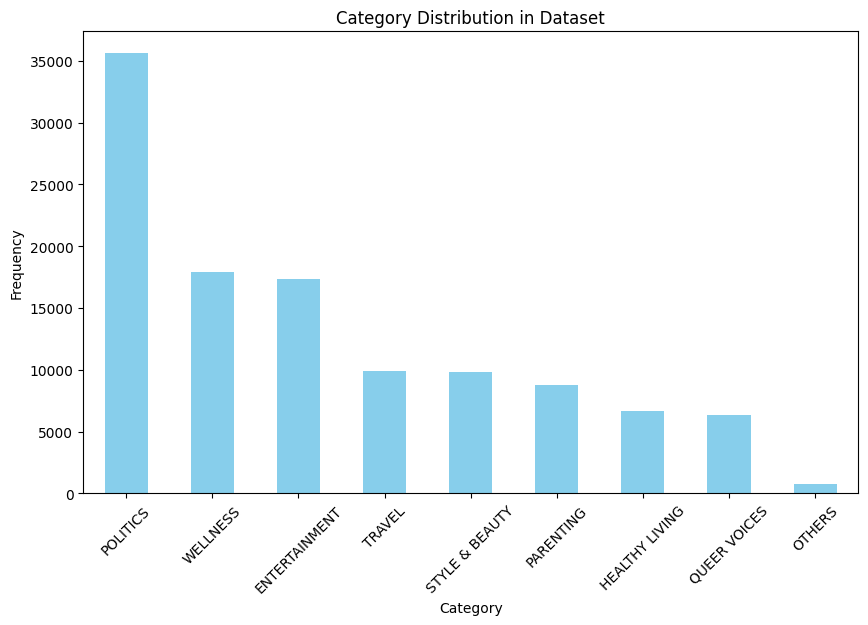

In [56]:
import matplotlib.pyplot as plt

# Plot the distribution of categories in the dataset
plt.figure(figsize=(10, 6))
df_news['category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Category Distribution in Dataset')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<h5>Plot EvaluationMatric</h5>

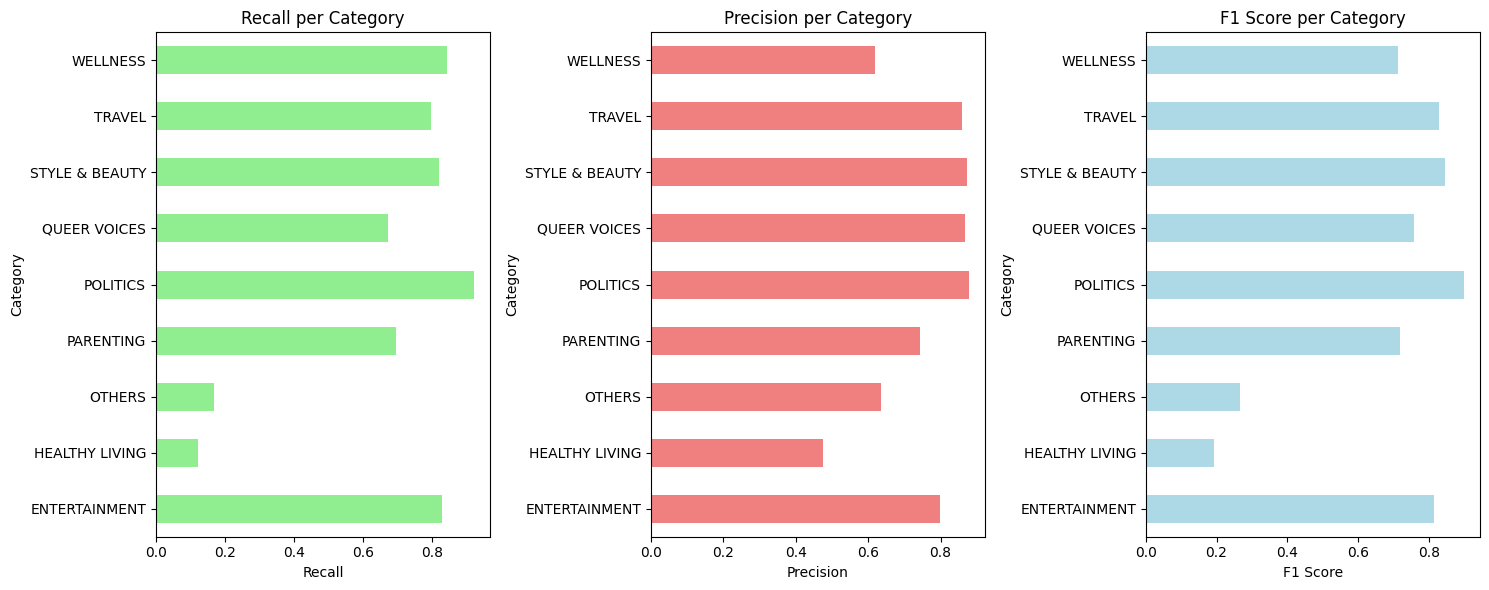

In [58]:
import numpy as np

# Calculate precision, recall, f1 score for each class
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

# Create a DataFrame for the evaluation metrics
metrics_df = pd.DataFrame({
    'Category': encoder.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Plot recall, precision, and F1 score for each class
metrics_df.set_index('Category', inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Plot Recall
metrics_df['Recall'].plot(kind='barh', ax=axes[0], color='lightgreen')
axes[0].set_title('Recall per Category')
axes[0].set_xlabel('Recall')

# Plot Precision
metrics_df['Precision'].plot(kind='barh', ax=axes[1], color='lightcoral')
axes[1].set_title('Precision per Category')
axes[1].set_xlabel('Precision')

# Plot F1 Score
metrics_df['F1 Score'].plot(kind='barh', ax=axes[2], color='lightblue')
axes[2].set_title('F1 Score per Category')
axes[2].set_xlabel('F1 Score')

plt.tight_layout()
plt.show()
